#### Module Importation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
ols = LinearRegression()

In [2]:
#### Helper Functions

In [3]:
def dummify_column(dataframe,column_name):
    '''
    ### NOTE!!! ### vector operation not working yet!!!! ###
    - dataframe takes the entire dataframe you are working on
    - column_name takes a list of strings, where the strings are the column names
    '''
    for feature in column_name:
        dummified_feature = pd.get_dummies(dataframe.loc[:,feature], prefix=feature, prefix_sep='__',drop_first=True)
        dummified_df = pd.concat([dataframe.drop(feature,axis=1),dummified_feature],axis=1,sort='False')
    return dummified_df

def undummify(dataframe):
    tot_col=dataframe.columns
    cat_col=list(tot_col[tot_col.str.contains('__')])
    cat_col_split=set(map(lambda x:x.split('__')[0],cat_col))
    cat_dict={}
    for col in cat_col_split:
        sub_df=dataframe[cat_col].loc[:,list(map(lambda x:col in x, dataframe[cat_col].columns))]
        for i in sub_df.columns:
            label_num=int(i.split('__')[1])
            sub_df.loc[:,i]=np.array(sub_df.loc[:,i])*label_num
        cat_dict[col]=sub_df.sum(axis=1)+1
    df1=dataframe.drop(cat_col,axis=1)
    df2=pd.DataFrame(cat_dict)
    return pd.concat([df1,df2],axis=1)

# Import Data

In [4]:
df=pd.read_csv('train.csv',index_col='Id')

# Variable Type Definition

In [5]:
df_number = df.select_dtypes(include = 'number')
df_object = df.select_dtypes(include = 'object')
df_category = df.select_dtypes(include = 'category')
df_boolean = df.select_dtypes(include = 'bool')
df_datetime = df.select_dtypes(include = 'datetime')
df_timedelta = df.select_dtypes(include = 'timedelta')
#######################################################
nominal_var=list(df_object.columns)
ordinal_var=list(df_number.columns)
continuous_var=list(df_number.columns)
time_var=list(df_datetime.columns)

In [6]:
# Correlation Heatmaps

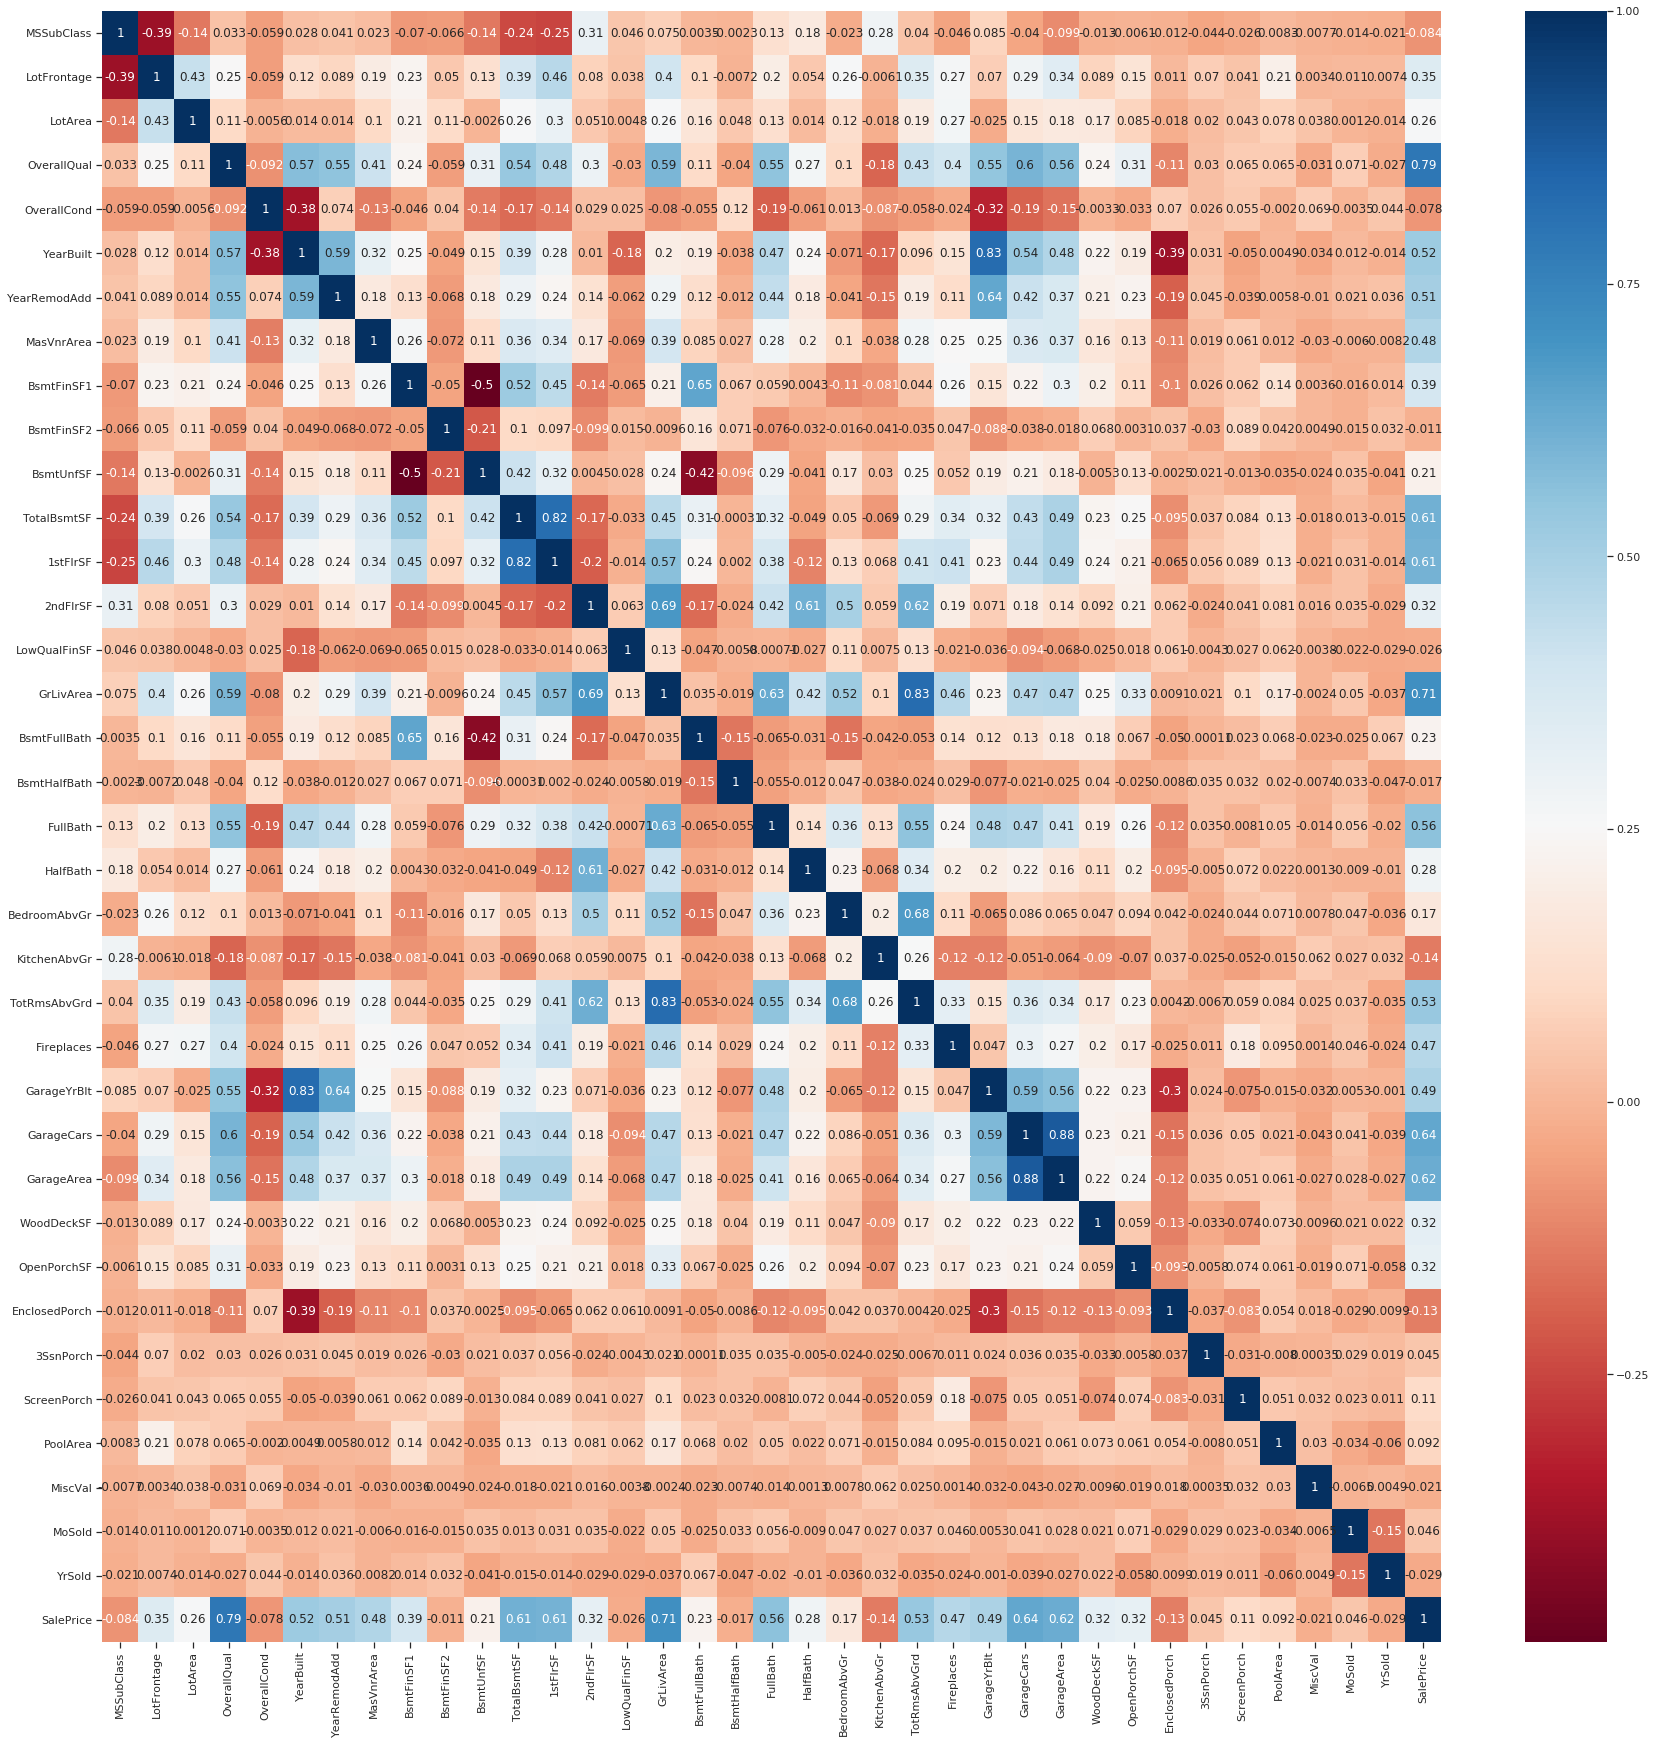

In [18]:
corr = df.corr(method="pearson")
plt.subplots(figsize=(30, 30))
cmap = sns.diverging_palette(150, 250, as_cmap=True)
sns.heatmap(corr, cmap="RdBu", annot = True);

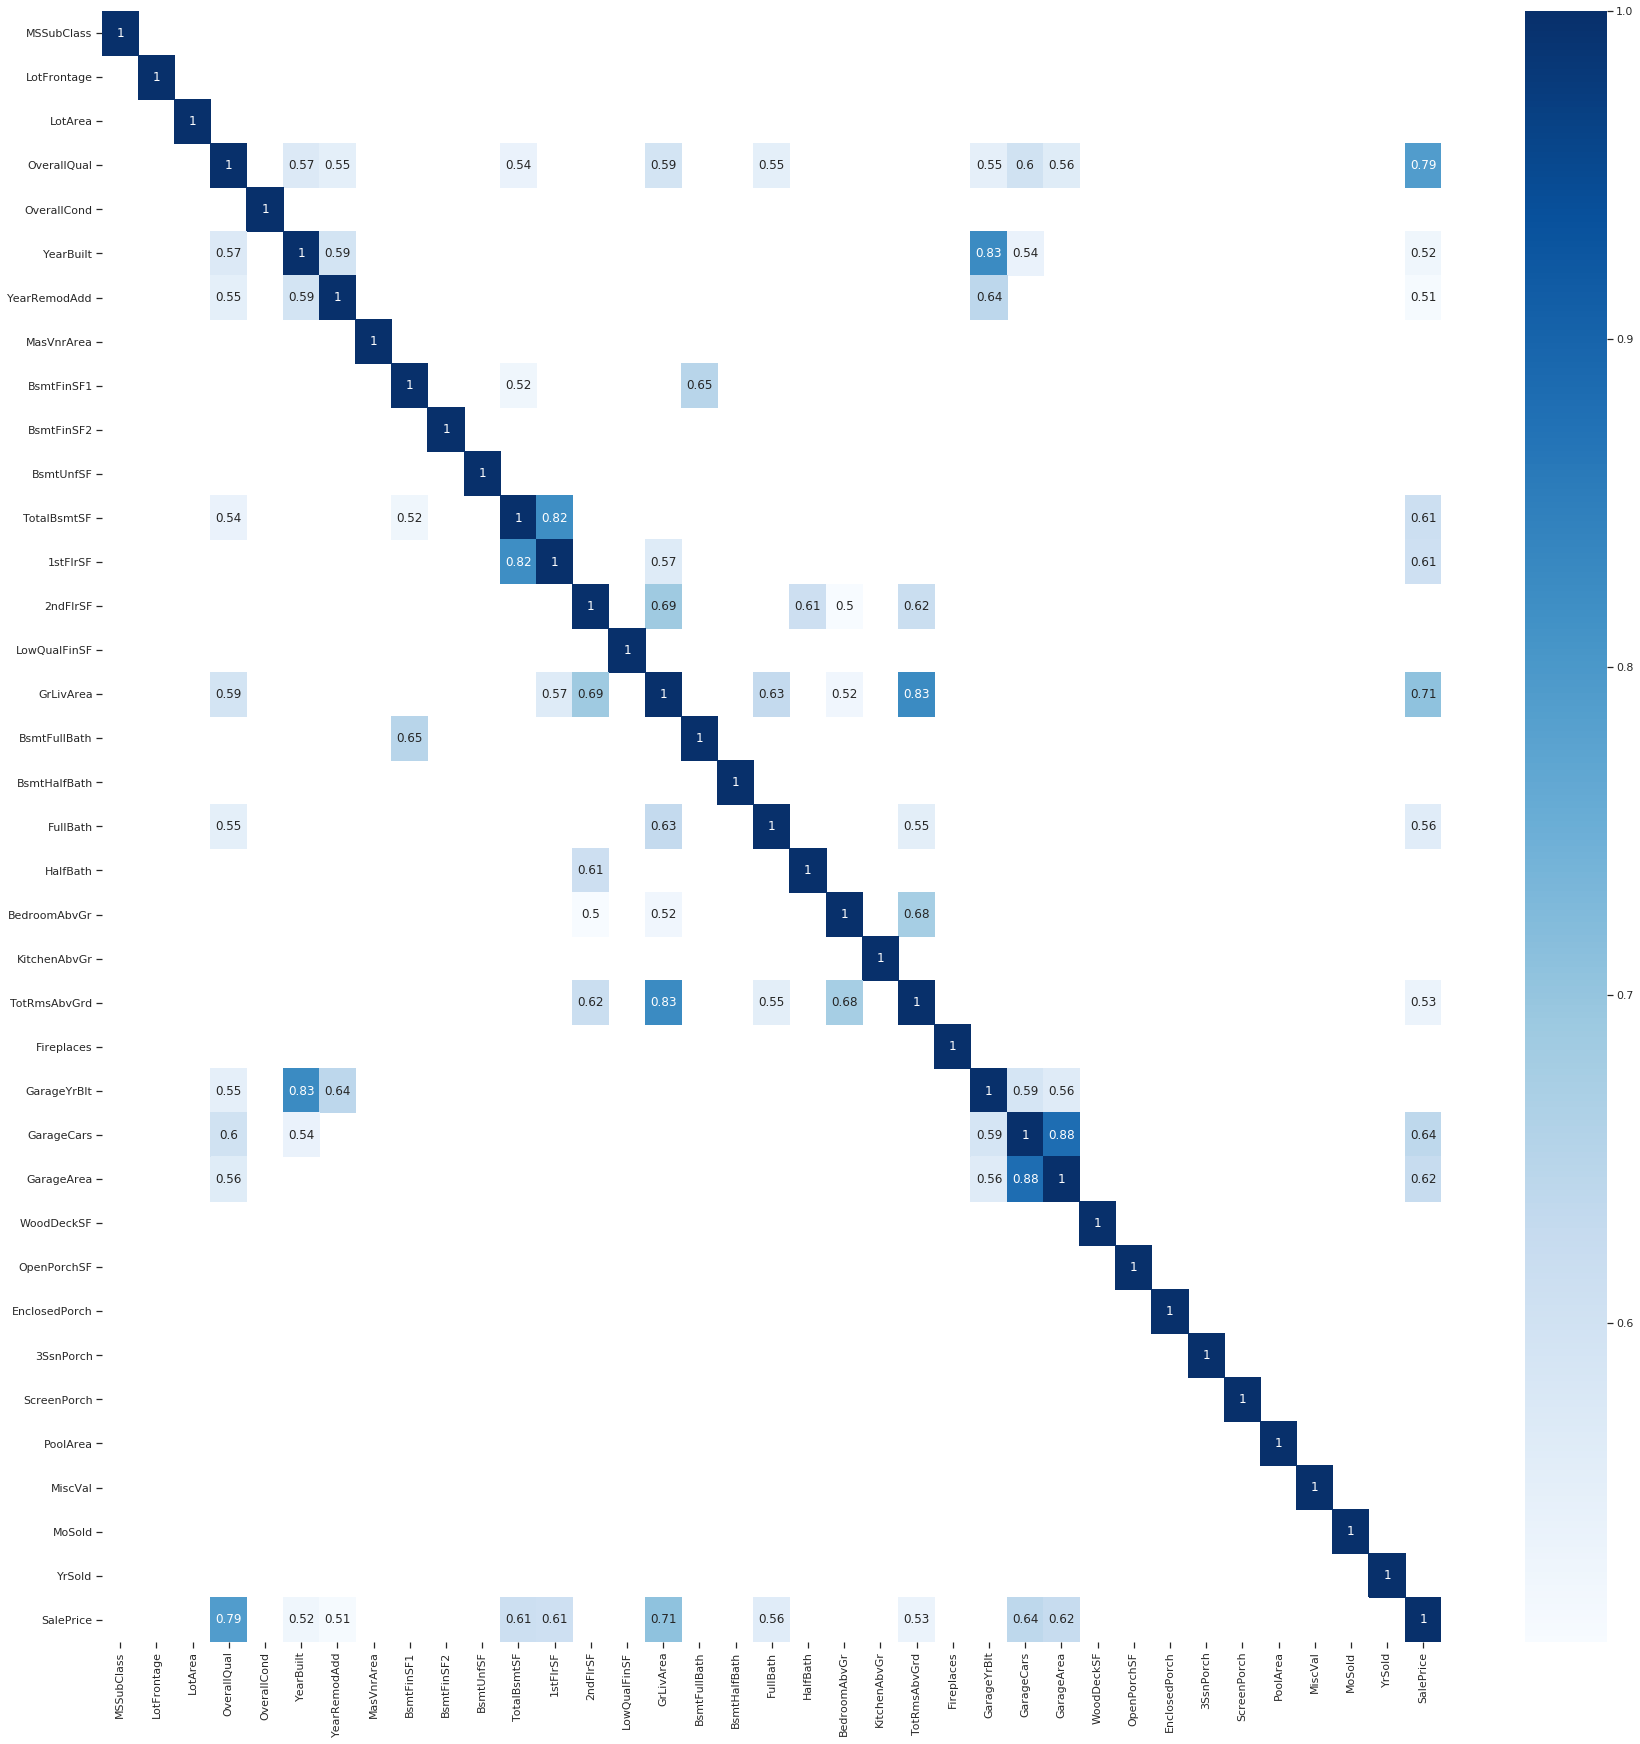

In [19]:
big_corr=corr[abs(corr)>0.5]
plt.subplots(figsize=(30, 30))
cmap = sns.diverging_palette(150, 250, as_cmap=True)
sns.heatmap(big_corr, cmap="Blues", annot = True);

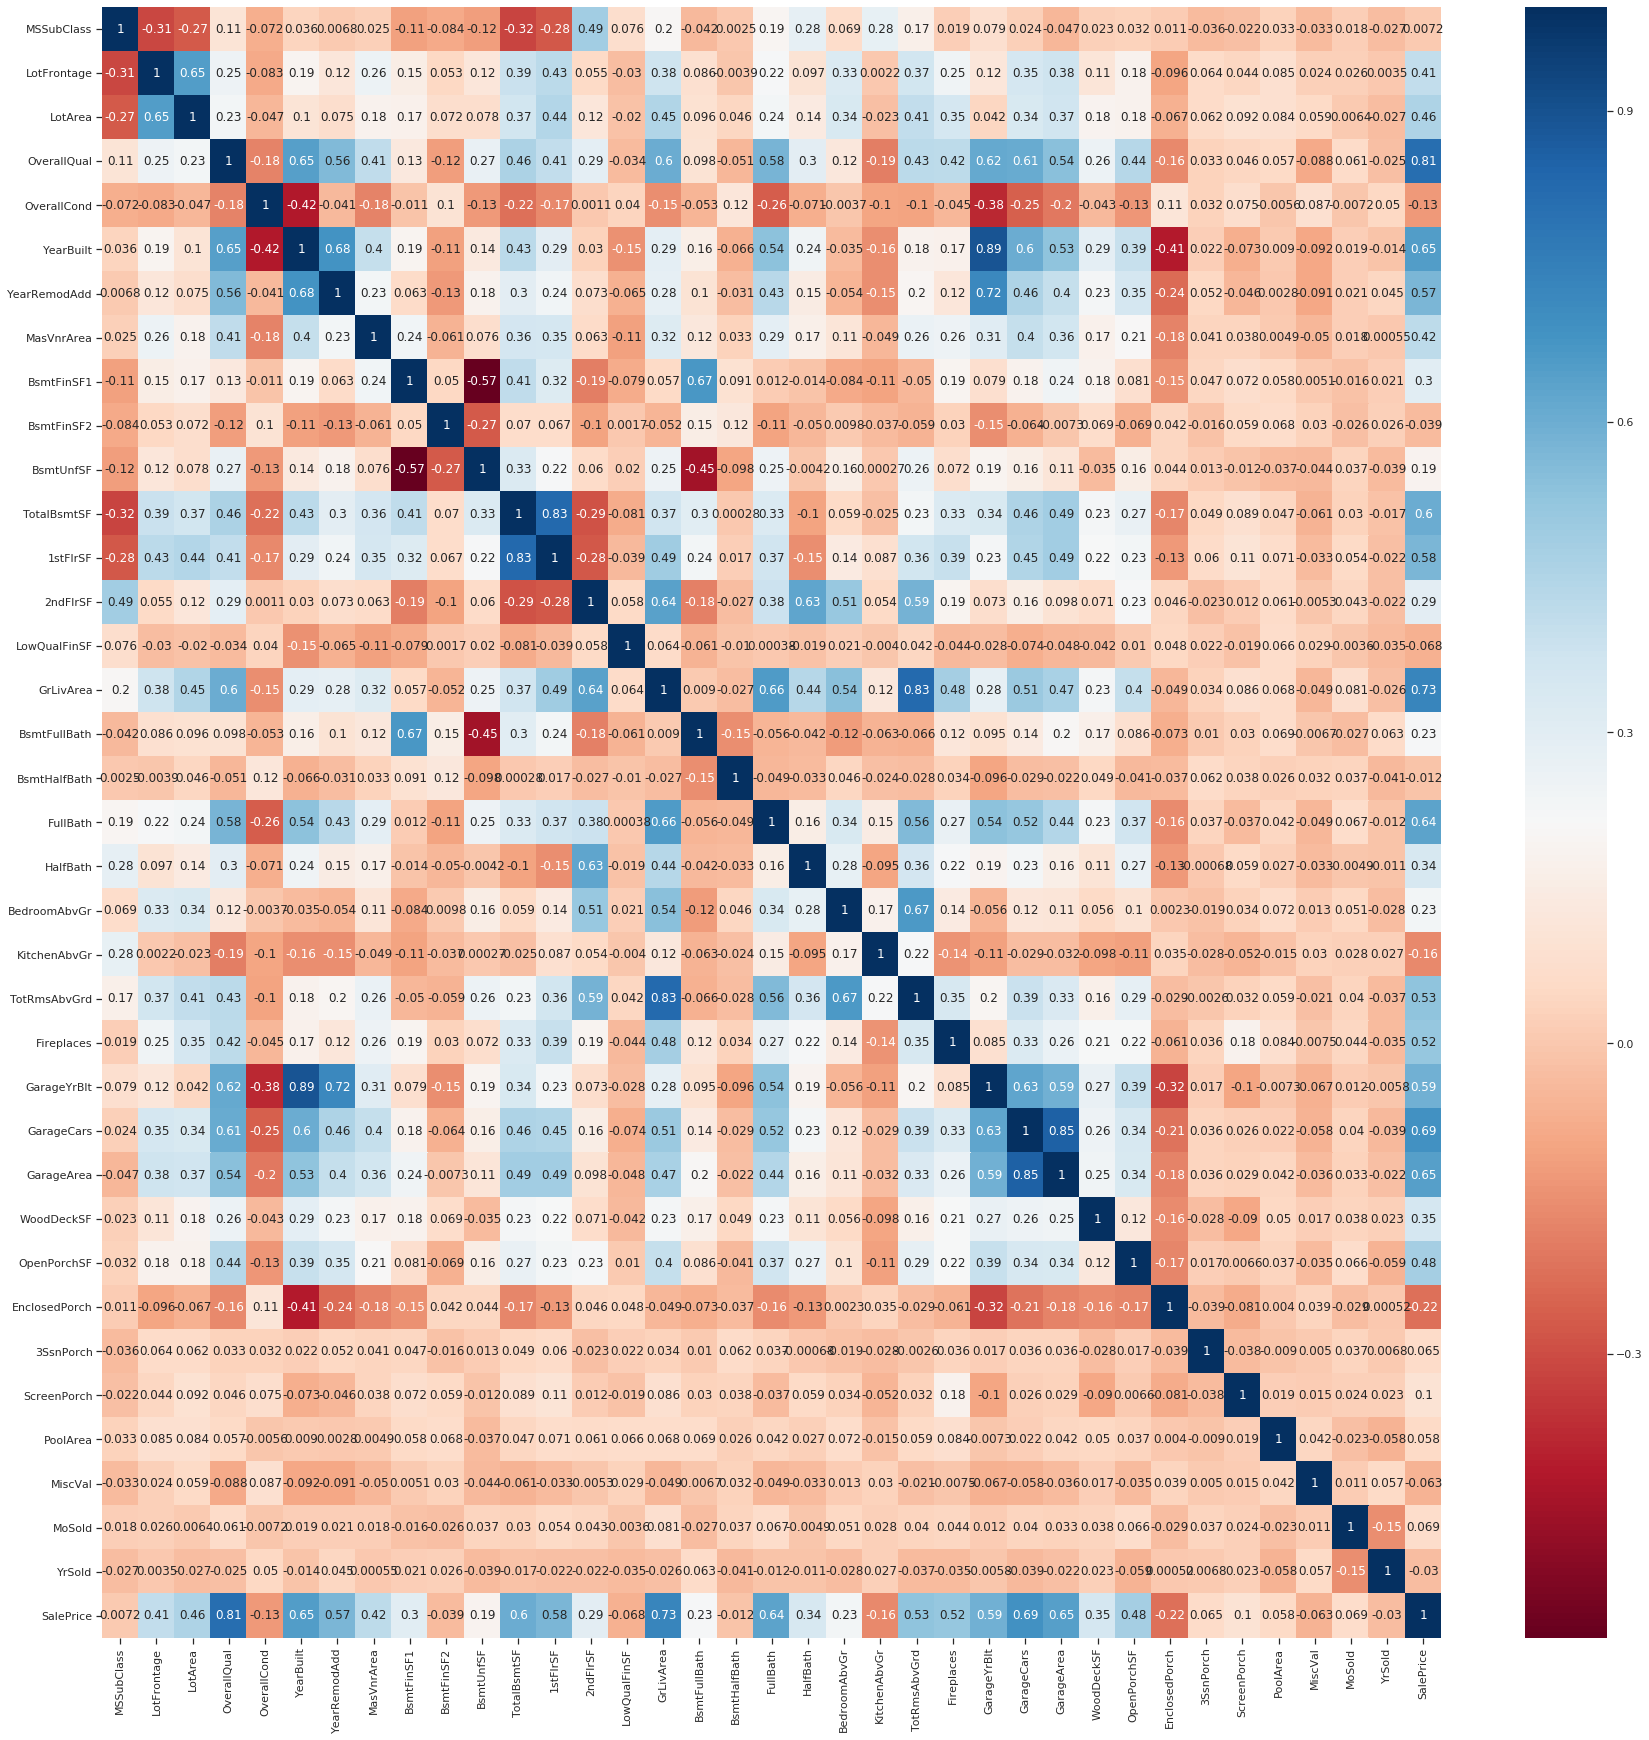

In [24]:
corr_spearman = df.corr(method="spearman")
plt.subplots(figsize=(30, 30))
cmap = sns.diverging_palette(150, 250, as_cmap=True)
sns.heatmap(corr_spearman, cmap="RdBu", annot = True);

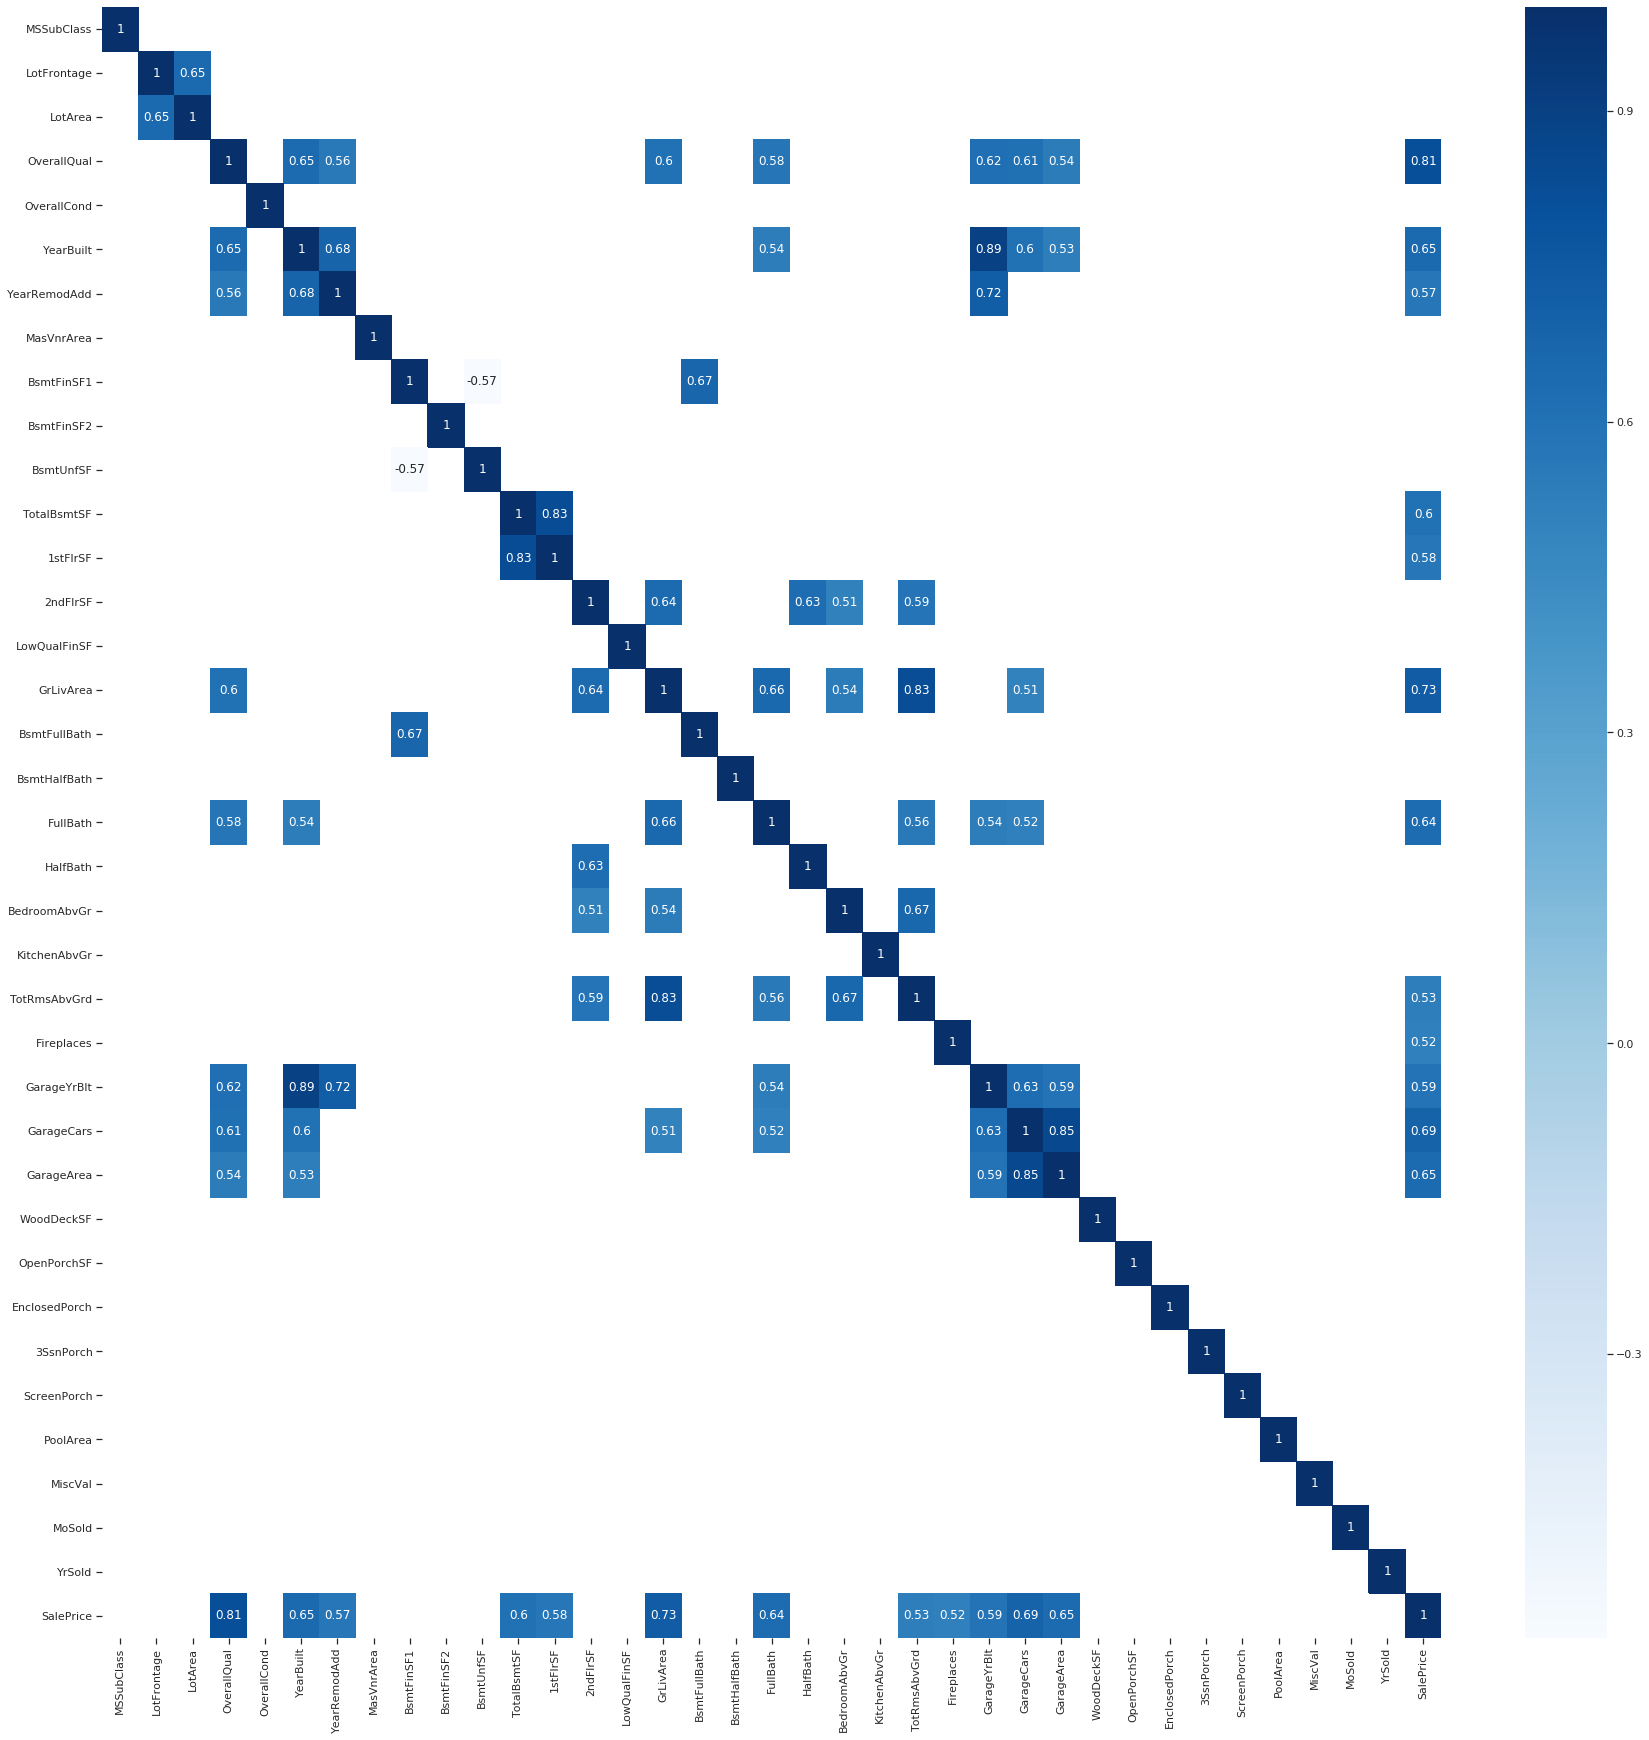

In [25]:
big_corr_spearman=corr[abs(corr_spearman)>0.5]
plt.subplots(figsize=(30, 30))
cmap = sns.diverging_palette(150, 250, as_cmap=True)
sns.heatmap(big_corr_spearman, cmap="Blues", annot = True);

/home/auscheng/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/auscheng/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


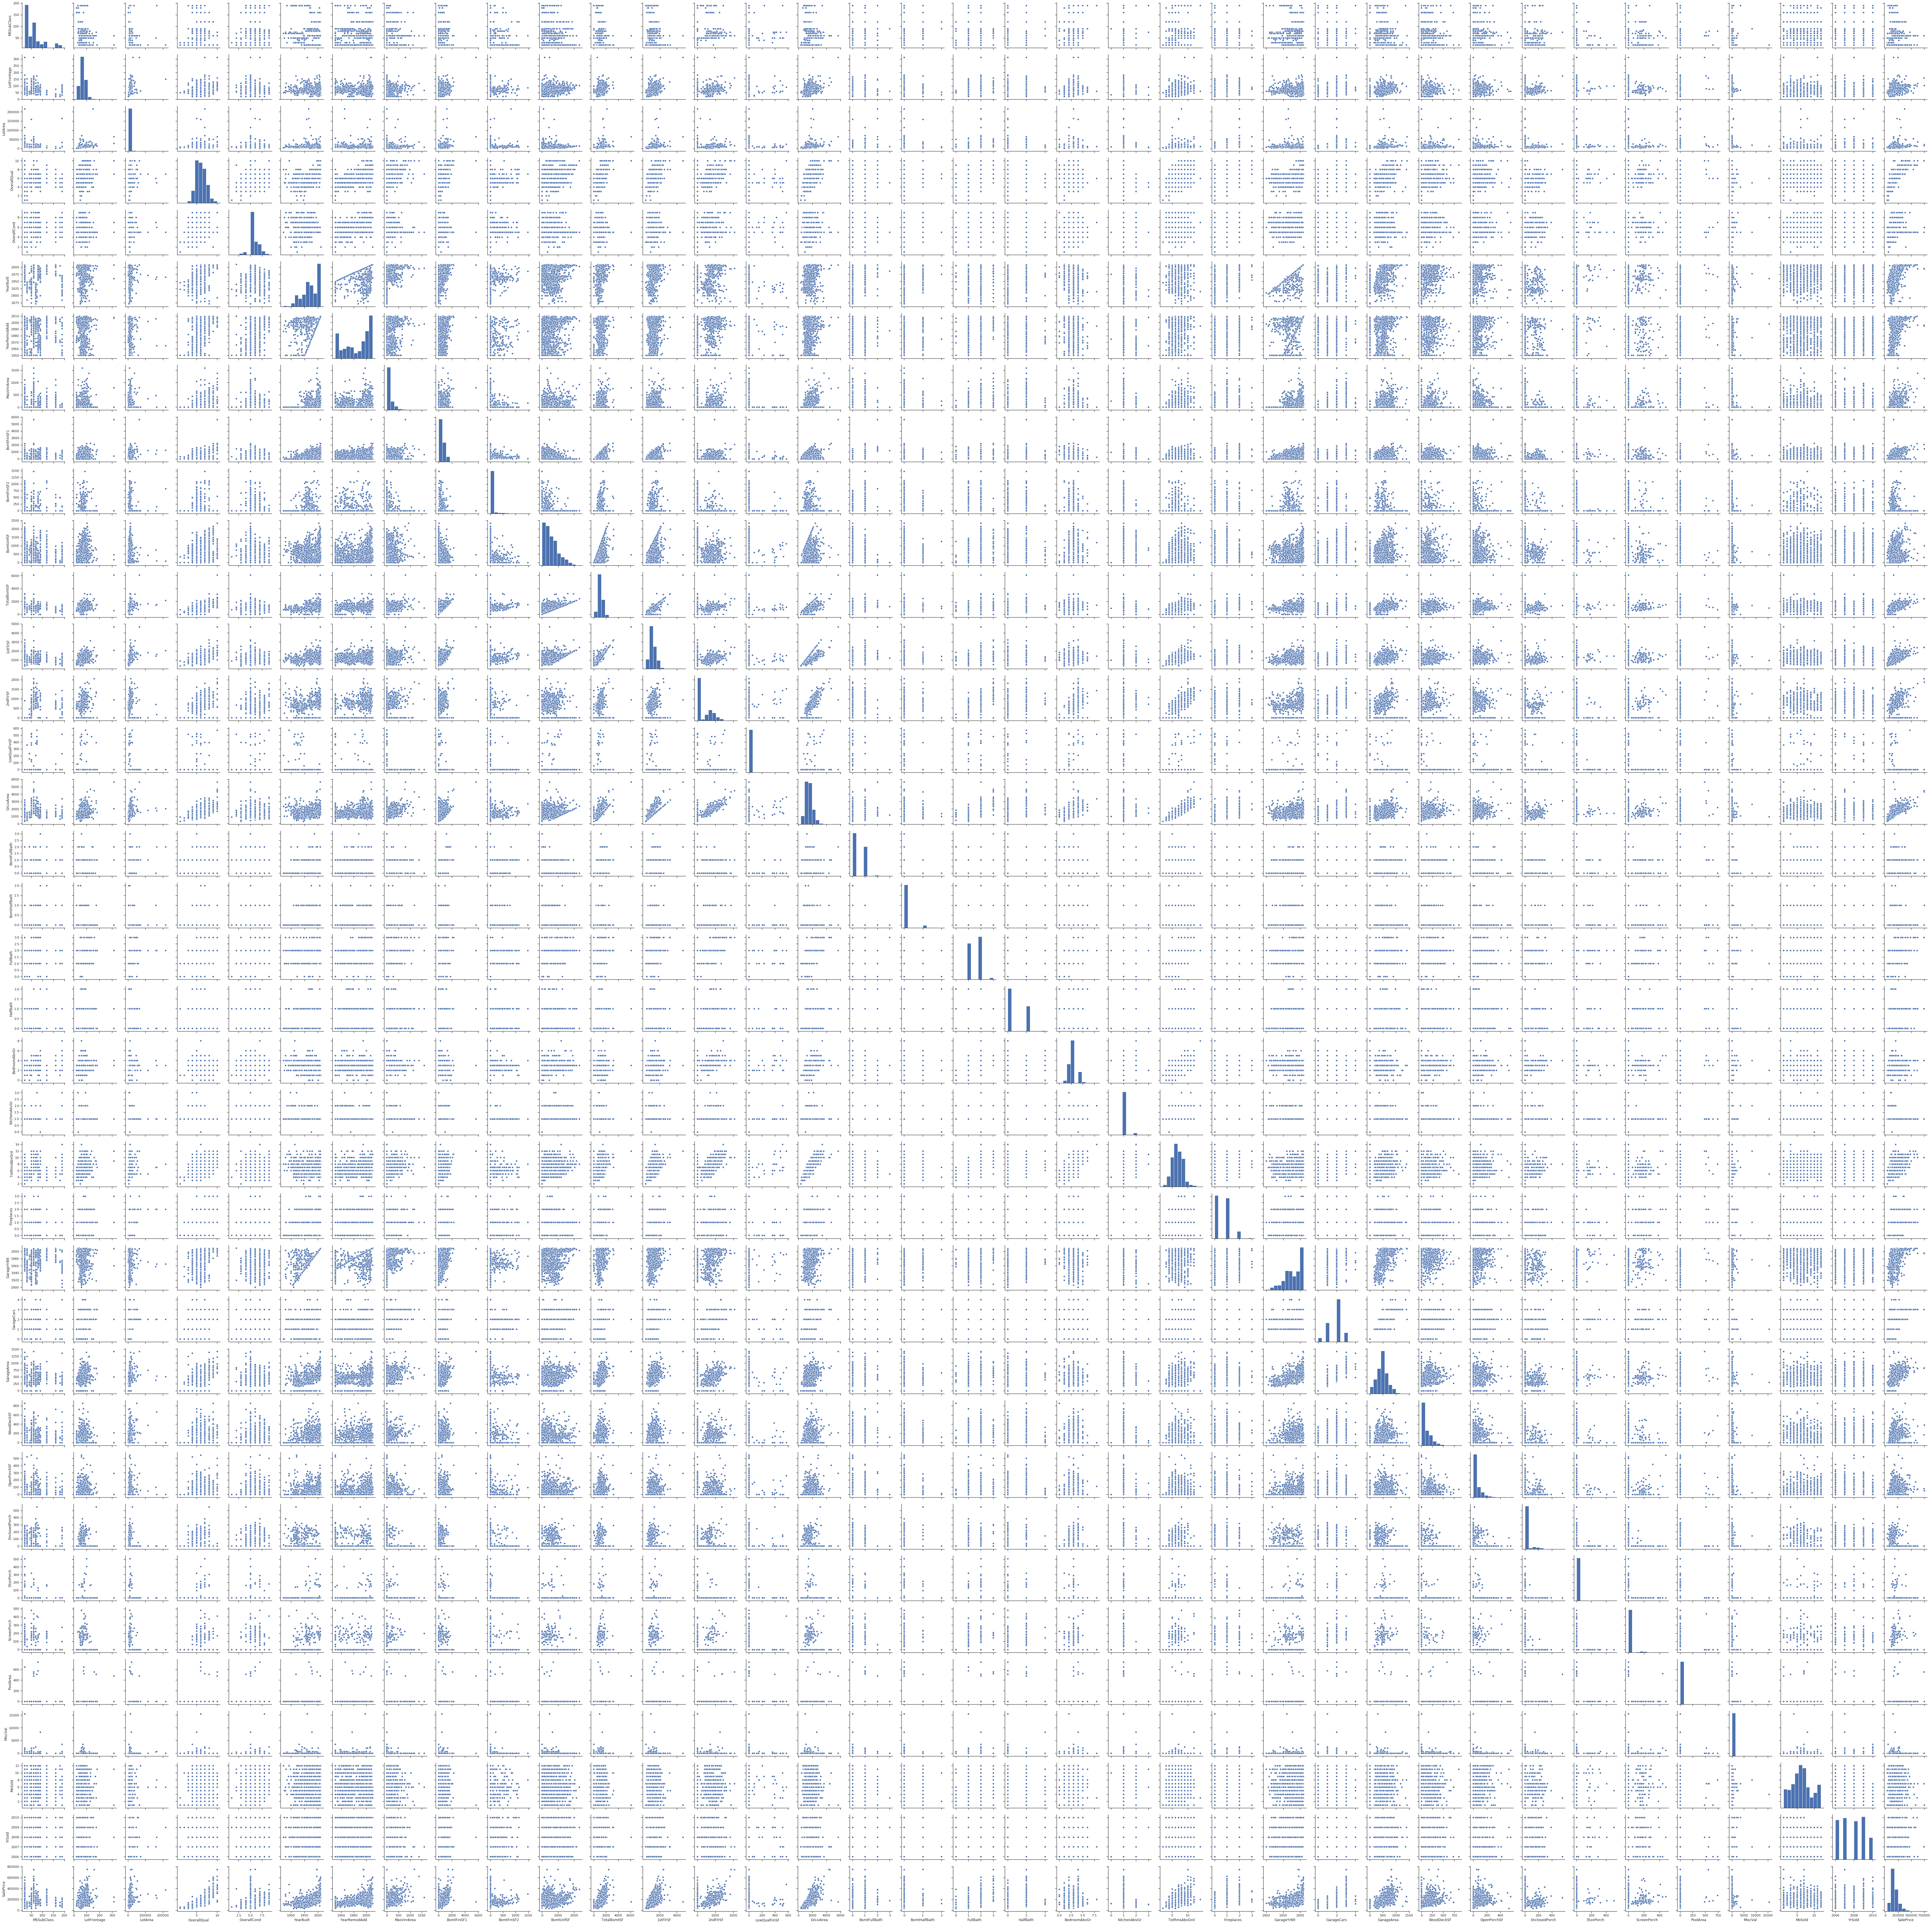

In [17]:
sns.set(style="ticks")
sns.pairplot(df_number)

In [14]:
x=df_number.drop('SalePrice',axis=1)
y=df_number.SalePrice

In [15]:
# R^2 score comparisons among continuous features against all other (continuous and categorical)
# High R^2 means collinearity exists between the features
# Continuous features vs continuous,ordinal,nominal variables
scores = {}
ols = LinearRegression()
for feature in continuous_var:
                x_copy = x.copy()
                feature_col = x_copy[feature].copy()
                x_copy.drop(feature, axis=1, inplace=True)
                ols.fit(x_copy, feature_col)
                scores[feature] = ols.score(x_copy, feature_col)   
plt.figure(figsize=(20,20))
ax=sns.barplot(x='index', y='R2', data=pd.DataFrame(scores, index=['R2']).T.reset_index())
plt.title('$R^2$ of one feature against the other features');
plt.xticks(rotation=90);
plt.yticks(size=60);
plt.xticks(size=30);
plt.xlabel(size=30);
# use R^2=0.4 and 0.8 as a cutoff. Below 0.4 is acceptable. Above 0.8 is unacceptable

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
# 

In [ ]:
x=dum_df.drop('SalePrice',axis=1)
y=dum_df.SalePrice

In [ ]:
# For umdummified (multiclass) classification
x=cat_df.drop('SalePrice',axis=1)
y=cat_df.SalePrice
# For dummified classification
cat_scores={}
logit=LogisticRegression(C=1e4,solver='liblinear',multi_class='ovr')
cat_cols=x.columns[~x.columns.isin(cont_var_for_tuning)]
for feature in cat_cols:
    x_copy=x.copy()
    feature_col=x_copy[feature].copy()
    x_copy.drop(feature,axis=1,inplace=True)
    logit.fit(x_copy, feature_col)
    cat_scores[feature] = metrics.r2_score(feature_col, logit.predict(x_copy))
plt.figure(figsize=(40,40))
ax=sns.barplot(x='index', y='R2', data=pd.DataFrame(cat_scores, index=['R2']).T.reset_index())
plt.title('$R^2$ of one feature against the other features');
plt.xticks(rotation=90);
plt.yticks(size=60);
plt.xticks(size=30);
plt.xlabel(size=30);
# use R^2=0.4 and 0.8 as a cutoff. Below 0.4 is acceptable. Above 0.8 is unacceptable